In [ ]:
#!pip install mediapipe

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import os

import cv2
import mediapipe as mp

Read Data from csv file

In [12]:
PreparedData_train= pd.read_csv('Prepared_Data_train.csv')
PreparedData_test= pd.read_csv('Prepared_Data_test.csv')

In [13]:
PreparedData_train
PreparedData_test

,keypoint_1,keypoint_2,keypoint_3,keypoint_4,keypoint_5,keypoint_6,keypoint_7,keypoint_8,keypoint_9,keypoint_10,...,keypoint_128,keypoint_129,keypoint_130,keypoint_131,keypoint_132,keypoint_133,keypoint_134,keypoint_135,keypoint_136,labels
0,163.779694,91.169861,146.453796,103.604561,41.397285,26.569262,53.641598,157.573517,157.992249,158.932190,...,151.495880,126.962822,58.803360,20.431931,68.538559,124.941536,54.426525,121.739151,80.930710,0
1,145.786530,75.810089,128.833801,88.287056,27.920422,14.905223,39.512505,136.600143,139.276505,141.700928,...,139.889389,122.059692,65.855751,18.063148,59.798080,101.837402,46.533039,98.069794,64.416733,0
2,141.891464,79.973206,119.463417,91.092255,30.390879,18.084602,40.789085,134.667709,135.219955,135.679337,...,132.465866,107.238571,52.962517,16.806318,57.376030,102.180695,47.216717,100.238403,62.333145,0
3,140.221741,79.201744,114.604553,90.086380,30.246948,18.162029,40.336712,132.748566,133.326309,133.860809,...,130.044388,107.751778,52.193695,16.290197,56.694855,101.436775,46.360920,99.663460,64.092499,0
4,152.177353,80.612091,122.859909,91.184547,34.715118,22.225023,45.047554,144.558914,144.861954,145.180023,...,140.747070,115.663757,51.960030,17.292316,52.458340,104.466072,42.329777,103.684059,69.759811,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,166.734772,111.564140,154.473679,123.573776,39.351849,23.921600,52.809097,165.637863,166.320297,167.744125,...,157.872833,126.890022,63.273212,21.690733,86.559586,144.173615,72.095016,139.819839,83.773430,1
78,168.390488,113.083511,157.329712,125.050911,39.154942,23.600828,52.845493,167.326630,167.903625,169.102631,...,160.526245,127.601288,64.712471,22.033854,89.023384,145.697800,74.660416,141.308289,82.515259,1
79,173.916351,119.268188,160.683914,132.765808,41.160248,25.878012,54.773094,171.159531,170.002335,169.522263,...,163.331192,125.356796,63.678726,22.658360,90.901588,150.360168,77.484100,146.753815,83.243507,1
80,175.977783,104.320038,154.822510,118.703094,38.063869,21.719744,51.932209,165.456940,165.574127,166.051987,...,167.162689,139.969482,72.168221,21.944817,85.807106,142.056732,69.581512,136.082413,83.930374,1


Check which rows are all 0.0 values

In [14]:
def is_row_all_zero(df):
    return (df == 0).all(axis=1)

In [15]:
# Check for null rows in CombinedData_train
null_rows_train = is_row_all_zero(PreparedData_train)
# Print the results for CombinedData_train
print("Null rows in PrepareddData_train:")
print(PreparedData_train[null_rows_train].to_string)

# Check for null rows in CombinedData_test
null_rows_test = is_row_all_zero(PreparedData_test)
# Print the results for CombinedData_test
print("Null rows in PreparedData_test:")
print(PreparedData_test[null_rows_test].to_string)

Null rows in PrepareddData_train:
<bound method DataFrame.to_string of      keypoint_1  keypoint_2  keypoint_3  keypoint_4  keypoint_5  keypoint_6  \
1           0.0         0.0         0.0         0.0         0.0         0.0   
9           0.0         0.0         0.0         0.0         0.0         0.0   
18          0.0         0.0         0.0         0.0         0.0         0.0   
26          0.0         0.0         0.0         0.0         0.0         0.0   
35          0.0         0.0         0.0         0.0         0.0         0.0   
42          0.0         0.0         0.0         0.0         0.0         0.0   
51          0.0         0.0         0.0         0.0         0.0         0.0   
60          0.0         0.0         0.0         0.0         0.0         0.0   
69          0.0         0.0         0.0         0.0         0.0         0.0   
80          0.0         0.0         0.0         0.0         0.0         0.0   
89          0.0         0.0         0.0         0.0         

In [16]:
PreparedData_train.iloc[60]

keypoint_1      0.0
keypoint_2      0.0
keypoint_3      0.0
keypoint_4      0.0
keypoint_5      0.0
               ... 
keypoint_133    0.0
keypoint_134    0.0
keypoint_135    0.0
keypoint_136    0.0
labels          0.0
Name: 60, Length: 137, dtype: float64

Updata Data when remove null values in rows

In [17]:
# Remove null rows from CombinedData_train and reset the index
PreparedData_train = PreparedData_train[~null_rows_train].reset_index(drop=True)

# Remove null rows from CombinedData_test and reset the index
PreparedData_test = PreparedData_test[~null_rows_test].reset_index(drop=True)

PreparedData_train
#PreparedData_test

,keypoint_1,keypoint_2,keypoint_3,keypoint_4,keypoint_5,keypoint_6,keypoint_7,keypoint_8,keypoint_9,keypoint_10,...,keypoint_128,keypoint_129,keypoint_130,keypoint_131,keypoint_132,keypoint_133,keypoint_134,keypoint_135,keypoint_136,labels
0,163.664474,90.513741,146.504486,103.103722,41.132977,26.284529,53.388084,157.192551,157.669434,158.640305,...,151.453857,127.777740,59.711452,20.404633,68.738350,124.229820,54.441013,120.916313,80.617043,0
1,143.340607,79.674156,116.493431,90.293976,30.888317,18.762798,40.987434,135.685150,136.071503,136.550247,...,133.352234,108.716286,52.639278,16.408901,56.403133,103.284714,46.507633,101.652672,64.567787,0
2,142.879715,79.586571,115.895470,90.090302,30.913603,18.820942,41.002663,135.051285,135.247147,135.549332,...,132.593323,109.184921,52.396069,16.425650,56.583107,102.539406,46.367664,100.901543,64.886978,0
3,139.387253,78.635429,113.522697,89.567940,30.238636,18.126881,40.340809,131.738785,132.401260,133.023788,...,129.486847,109.564568,51.572750,16.233177,54.711681,100.827972,43.839382,98.996712,66.505966,0
4,138.244141,78.604408,112.401917,89.275009,30.153748,18.085264,40.221664,130.422836,130.810471,131.297012,...,128.207367,106.818871,52.016098,16.228405,56.489769,100.602577,45.854210,98.469322,63.562382,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,172.406265,106.317368,153.680298,120.272507,37.659008,21.287334,51.585148,163.849808,163.904541,164.472366,...,164.105988,137.231873,70.663490,21.986149,87.220192,143.476181,70.688782,137.036407,84.157104,1
299,172.098068,106.414703,154.260330,120.298096,37.665169,21.338566,51.569653,163.812119,163.841309,164.393555,...,163.779907,136.606522,69.874969,21.970009,87.281319,143.580841,70.823830,137.237442,84.251595,1
300,171.321091,105.949883,153.248749,119.906929,37.533974,21.216528,51.425629,162.632172,162.704132,163.416321,...,162.993225,136.335617,70.075043,21.935802,86.632469,142.565903,70.105713,136.114624,83.713043,1
301,172.246674,105.099678,153.191223,119.064178,37.493763,21.191399,51.348728,163.132431,163.271576,163.911469,...,163.839371,137.463837,70.669167,21.874235,86.482178,142.552139,69.983269,136.174973,84.070641,1


In [ ]:
# z_coords = PreparedData_train.iloc[:,2::3]
# #z_coords.min().min()
# # abs_min_z = abs(z_coords.min().min())

# PreparedData_train.iloc[:,2::3] = PreparedData_train.iloc[:,2::3].add(0.5)
# PreparedData_train

In [11]:
# abs_min_z

Save file npz 

In [18]:
from pandas.core.dtypes.dtypes import PandasExtensionDtype
import numpy as np
import os

# Define the custom directory where you want to save the .npz files
save_directory = "D:\\5_Fall23\DPL302m\Abnormal_Behavior\Source\Data"

def df_to_npz(path):
  pass 

# Specify the file paths for the DataFrames
combined_data_train_path = os.path.join(save_directory, 'Preprocessed_Data_train.npz')
combined_data_test_path = os.path.join(save_directory, 'Preprocessed_Data_test.npz')

# Save CombinedData_train to its .npz file
np.savez(combined_data_train_path, landmarks=PreparedData_train.iloc[:,:-1], labels = PreparedData_train.iloc[:,-1])

# Save CombinedData_test to its .npz file
np.savez(combined_data_test_path, landmarks=PreparedData_test.iloc[:,:-1], labels = PreparedData_test.iloc[:,-1])

Check imbalanced data


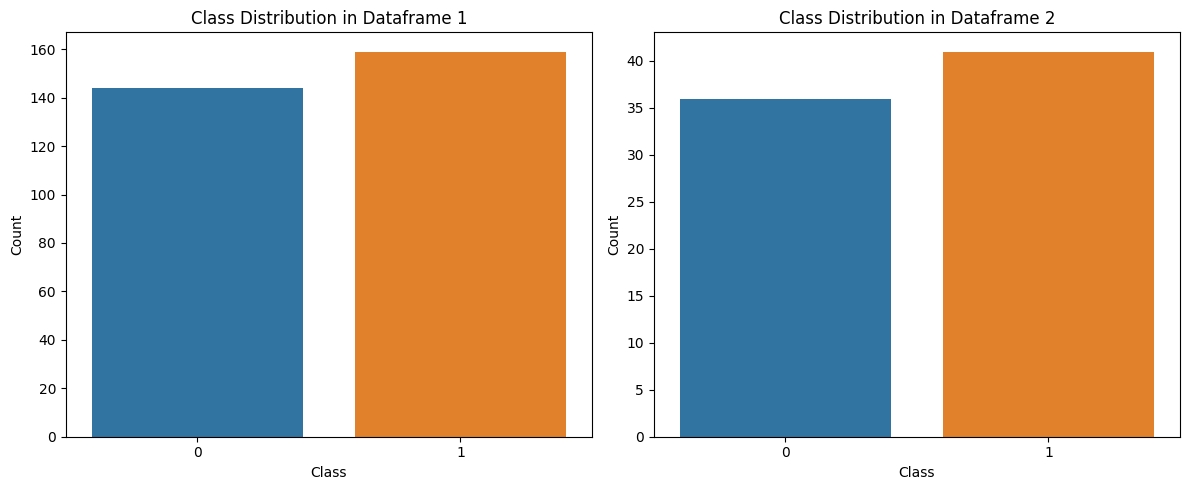

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_class_distribution(dataframe1, dataframe2):
    # Count the number of samples in each class for the first dataframe
    class_counts1 = dataframe1['labels'].value_counts()

    # Count the number of samples in each class for the second dataframe
    class_counts2 = dataframe2['labels'].value_counts()

    # Create subplots to visualize class distribution
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot for the first dataframe
    sns.barplot(x=class_counts1.index, y=class_counts1, ax=axes[0])
    axes[0].set_title("Class Distribution in Dataframe 1")
    axes[0].set_xlabel("Class")
    axes[0].set_ylabel("Count")

    # Plot for the second dataframe
    sns.barplot(x=class_counts2.index, y=class_counts2, ax=axes[1])
    axes[1].set_title("Class Distribution in Dataframe 2")
    axes[1].set_xlabel("Class")
    axes[1].set_ylabel("Count")

    plt.tight_layout()
    plt.show()

# Example usage:
visualize_class_distribution(PreparedData_train, PreparedData_test)


Kernel Density Plots to visualize values in data.


In [ ]:

def visualize_kde_plots(dataframe):
    # Create a subset of the DataFrame by excluding the 'labels' column
    subset = dataframe.drop(columns=['labels'], errors='ignore')

    # Create Kernel Density Plots for the selected columns
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    for column in subset.columns:
        sns.kdeplot(subset[column], label=column, shade=True)

    plt.title("Kernel Density Plots for Selected Columns")
    plt.xlabel("Values")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

visualize_kde_plots(PreparedData_train)
visualize_kde_plots(PreparedData_test)


PCA_FUNCTION


In [21]:


def perform_pca(input_df, n_components=3):
    # Create a PCA model
    pca = PCA(n_components=n_components)

    # Fit the PCA model to the input DataFrame
    pca_result = pca.fit_transform(input_df)

    # Create a new DataFrame with the PCA components
    pca_df = pd.DataFrame(data=pca_result, columns=[f'f{i+1}' for i in range(n_components)])

    return pca_df

In [22]:
pca_PreparedData_train = perform_pca(PreparedData_train.drop(columns=['labels']), n_components=3)
pca_PreparedData_train = pd.concat([pca_PreparedData_train, PreparedData_train['labels']], axis=1)

print("pca_CombinedData_train:  ")
print(pca_PreparedData_train)
# --------------------------------------------------------

pca_PreparedData_test= perform_pca(PreparedData_test.drop(columns=['labels']), n_components=3)
pca_PreparedData_test = pd.concat([pca_PreparedData_test, PreparedData_test['labels']], axis=1)

print("pca_CombinedData_test:  ")
print(pca_PreparedData_test)

pca_CombinedData_train:  
             f1         f2         f3  labels
0   -119.709216 -16.341517  78.271924       0
1     71.573460 -20.539027  80.711753       0
2     75.296459 -21.951357  79.959364       0
3     90.926410 -24.127676  74.294081       0
4    101.955918 -20.721620  69.998046       0
..          ...        ...        ...     ...
298 -237.856038  -0.384173  32.932927       1
299 -236.158393   1.944222  33.804018       1
300 -229.340504   0.174839  31.816944       1
301 -234.453607  -4.466803  33.988993       1
302 -236.217077  -6.385388  36.033292       1

[303 rows x 4 columns]
pca_CombinedData_test:  
            f1         f2         f3  labels
0  -148.463333 -28.701941 -74.294545       0
1   -43.702759 -75.188694 -46.939036       0
2    38.062772 -34.367282 -60.018950       0
3    58.824962 -34.943547 -58.133374       0
4   -11.121616 -49.821805 -85.273808       0
..         ...        ...        ...     ...
72 -224.834861  29.674464 -35.316931       1
73 -242.00246

Histogram for Label in pca_dataframe.

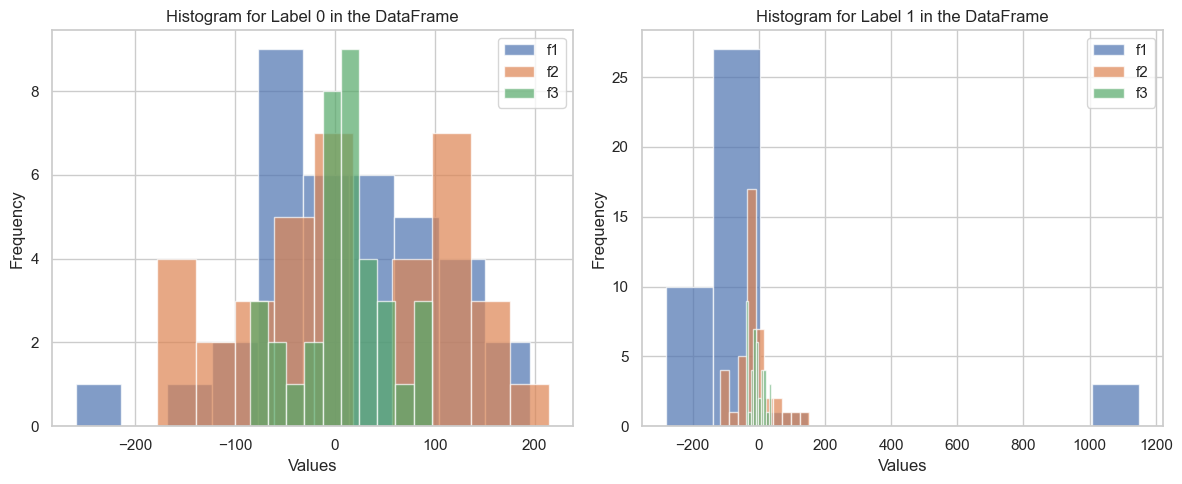

In [23]:
import matplotlib.pyplot as plt

def visualize_label_histograms(dataframe):
    # Create subplots for label 0 and label 1 histograms
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    for label_value in [0, 1]:
        ax = axes[label_value]

        for column in dataframe.columns:
            if column != 'labels':
                data_to_plot = dataframe[dataframe['labels'] == label_value][column]
                ax.hist(data_to_plot, bins=10, alpha=0.7, label=column)

        ax.set_title(f"Histogram for Label {label_value} in the DataFrame")
        ax.set_xlabel("Values")
        ax.set_ylabel("Frequency")
        ax.legend()

    plt.tight_layout()
    plt.show()


visualize_label_histograms(pca_PreparedData_test)

Visualize PCA Data

In [24]:

# Create a StandardScaler instance
scaler = StandardScaler()

# Select the columns for standardization (z-score scaling)
columns_to_standardize = [col for col in pca_PreparedData_train.columns if col != 'labels']

# Fit and transform the selected columns in both DataFrames
pca_PreparedData_train[columns_to_standardize] = scaler.fit_transform(pca_PreparedData_train[columns_to_standardize])
pca_PreparedData_test[columns_to_standardize] = scaler.transform(pca_PreparedData_test[columns_to_standardize])

# pca_CombinedData_train
pca_PreparedData_test

,f1,f2,f3,labels
0,-0.911778,-0.345047,-2.005227,0
1,-0.268398,-0.903898,-1.266896,0
2,0.233760,-0.413154,-1.619926,0
3,0.361270,-0.420082,-1.569034,0
4,-0.068303,-0.598944,-2.301560,0
...,...,...,...,...
72,-1.380809,0.356738,-0.953212,1
73,-1.486243,0.386937,-0.913600,1
74,-1.629410,0.555006,-0.987533,1
75,-1.730518,-0.314544,-1.033511,1


In [25]:
import pandas as pd
import plotly.express as px

def visualize_3d_scatter(data, x_column, y_column, z_column, color_column):
    # Create a 3D scatter plot
    fig = px.scatter_3d(data, x=x_column, y=y_column, z=z_column, color=color_column)

    # Show the plot
    fig.show()

# Example usage:
# Call the function with your specific DataFrames and columns
visualize_3d_scatter(pca_PreparedData_train, 'f1', 'f2', 'f3', 'labels')

Draw histograms graph for X, Y, Z Values.

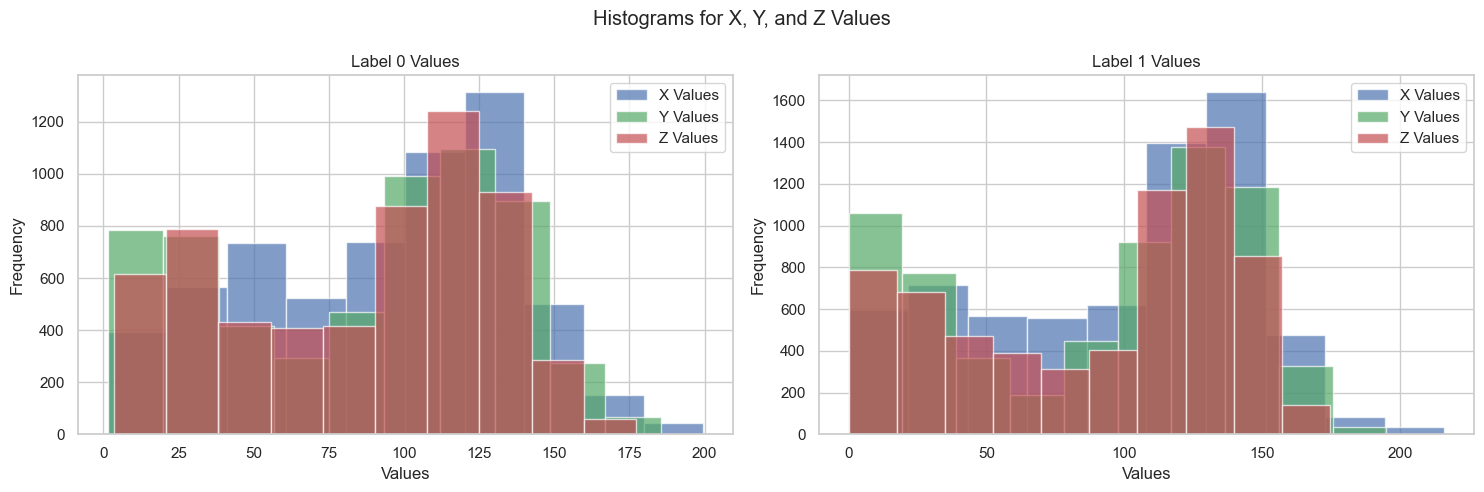

In [26]:
def create_histograms(dataframe):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle("Histograms for X, Y, and Z Values")

    for label in [0, 1]:
        label_data = dataframe[dataframe['labels'] == label]

        x_values = []
        y_values = []
        z_values = []

        for i in range(1, 127, 3):  # Start from 1 and increment by 3
            x_values.extend(label_data[f'keypoint_{i}'])
            y_values.extend(label_data[f'keypoint_{i + 1}'])
            z_values.extend(label_data[f'keypoint_{i + 2}'])

        ax = axes[label]

        ax.hist(x_values, bins=10, alpha=0.7, color='b', label='X Values')
        ax.hist(y_values, bins=10, alpha=0.7, color='g', label='Y Values')
        ax.hist(z_values, bins=10, alpha=0.7, color='r', label='Z Values')

        ax.set_title(f'Label {label} Values')
        ax.set_xlabel('Values')
        ax.set_ylabel('Frequency')
        ax.legend()

    plt.tight_layout()
    plt.show()

create_histograms(PreparedData_train)

Visualize Frequency of X, Y,Z in label 0 and label 1.

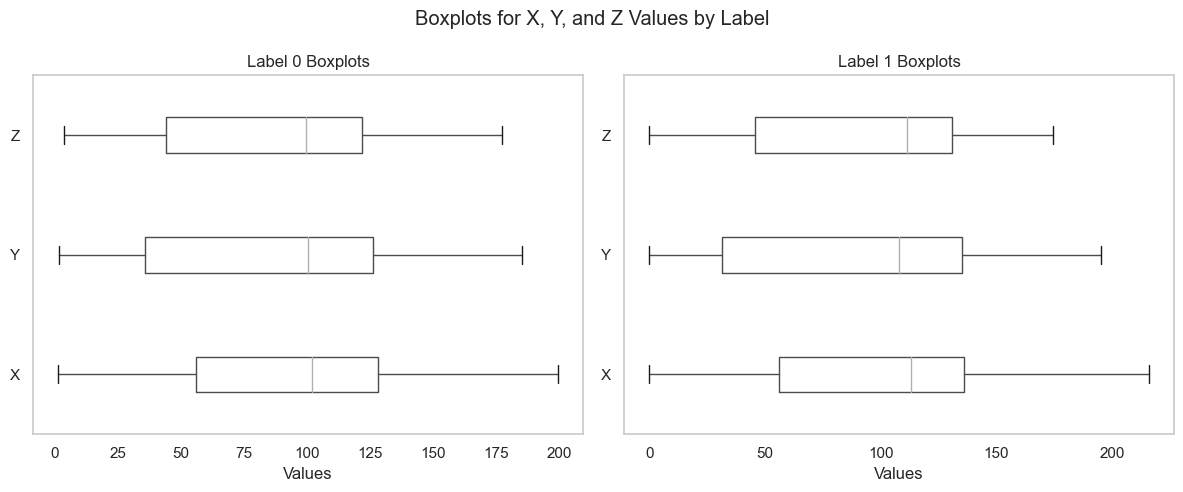

In [27]:

import pandas as pd
import matplotlib.pyplot as plt

def create_boxplots(dataframe):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle("Boxplots for X, Y, and Z Values by Label")

    for label in [0, 1]:
        label_data = dataframe[dataframe['labels'] == label]

        x_values = []
        y_values = []
        z_values = []

        for i in range(1, 127, 3):  # Start from 1 and increment by 3
            x_values.extend(label_data[f'keypoint_{i}'])
            y_values.extend(label_data[f'keypoint_{i + 1}'])
            z_values.extend(label_data[f'keypoint_{i + 2}'])

        ax = axes[label]

        data_to_plot = pd.DataFrame({'X Values': x_values, 'Y Values': y_values, 'Z Values': z_values})
        data_to_plot.boxplot(grid=False, ax=ax, vert=False)
        ax.set_title(f'Label {label} Boxplots')
        ax.set_xlabel('Values')
        ax.set_yticklabels(['X', 'Y', 'Z'])
        ax.set_ylabel('')

    plt.tight_layout()
    plt.show()

create_boxplots(PreparedData_train)



Visualize in Image data.

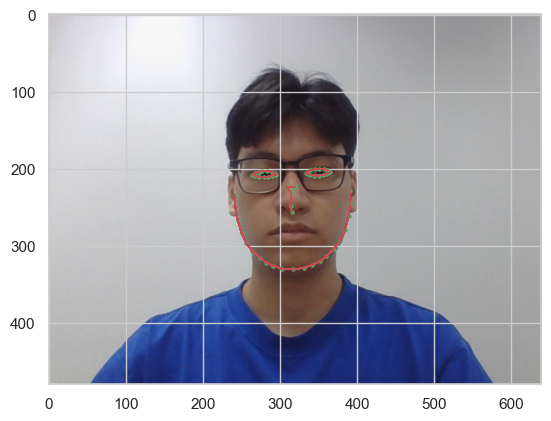

In [28]:

# Initialize MediaPipe Face Detection and Facial Landmarks models
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

# Define the indices of the desired keypoints (0 to 467)
cheeks = [234, 93, 132, 58, 172, 136, 150, 149, 176, 148, 152, 377, 400, 378, 379, 365, 397, 288, 361, 323, 454]
left_eyes = [33, 246, 161, 160, 159, 158, 157, 173, 133, 155, 154, 153, 145, 144, 163, 7]
right_eyes = [263, 466, 388, 387, 386, 385, 384, 398, 362, 382, 381, 380, 374, 373, 390, 249]
nose = [2, 1, 5, 3, 248]

desired_keypoint_indices = []  # Modify this list to choose your desired keypoints
desired_keypoint_indices.append(cheeks)
desired_keypoint_indices.append(nose)
desired_keypoint_indices.append(left_eyes)
desired_keypoint_indices.append(right_eyes)

image = cv2.imread(r'image_10.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

landmarks = face_mesh.process(rgb_image)

# Get the image size
ih, iw, _ = image.shape

if landmarks.multi_face_landmarks:
    for face_landmarks in landmarks.multi_face_landmarks:
        # Create a new figure and plot landmarks in a plot coordinate system
        plt.figure()
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Draw circles and lines only at the desired keypoints
        keypoints = [(int(landmark.x * iw), int(landmark.y * ih)) for landmark in face_landmarks.landmark]

        for indices in desired_keypoint_indices:
            keypoints_to_draw = [keypoints[index] for index in indices if index < len(keypoints)]

            for cx, cy in keypoints_to_draw:
                plt.scatter(cx, cy, s=5, c='g', marker='o')

            for i in range(len(keypoints_to_draw) - 1):
                x, y = zip(*keypoints_to_draw)
                plt.plot(x, y, color='r', linewidth=1)

        plt.show()

# Close the OpenCV window
cv2.destroyAllWindows()

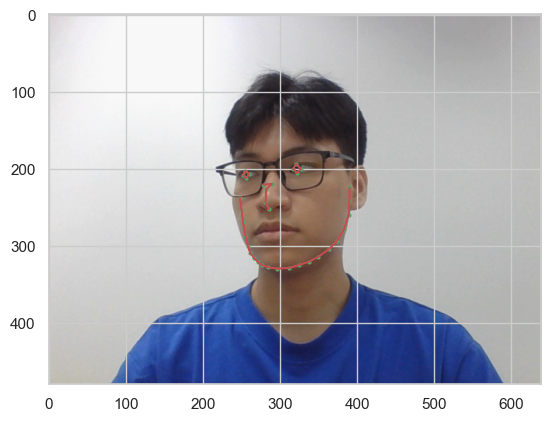

In [29]:
# Initialize MediaPipe Face Detection and Facial Landmarks models
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(refine_landmarks=True)

# Define the indices of the desired keypoints (0 to 467)
cheeks = [234, 93, 132, 58, 172, 136, 150, 149, 176, 148, 152, 377, 400, 378, 379, 365, 397, 288, 361, 323, 454]
nose = [2,1, 5,248, 3]
left_iris = [474, 475, 476, 477]
right_iris = [469, 470, 471, 472]
# left_eyes = [33, 159, 133, 145,]
# right_eyes = [263, 386, 374, 362]
desired_keypoint_indices = []  # Modify this list to choose your desired keypoints
desired_keypoint_indices.append(cheeks)
desired_keypoint_indices.append(nose)
desired_keypoint_indices.append(left_iris)
desired_keypoint_indices.append(right_iris)
# desired_keypoint_indices.append(left_eyes)
# desired_keypoint_indices.append(right_eyes)
image = cv2.imread(r'image_31.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

landmarks = face_mesh.process(rgb_image)

# Get the image size
ih, iw, _ = image.shape

if landmarks.multi_face_landmarks:
    for face_landmarks in landmarks.multi_face_landmarks:
        # Create a new figure and plot landmarks in a plot coordinate system
        plt.figure()
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Draw circles and lines only at the desired keypoints
        keypoints = [(int(landmark.x * iw), int(landmark.y * ih)) for landmark in face_landmarks.landmark]

        for indices in desired_keypoint_indices:
            keypoints_to_draw = [keypoints[index] for index in indices if index < len(keypoints)]

            for cx, cy in keypoints_to_draw:
                plt.scatter(cx, cy, s=4, c='g', marker='o')

            # Connect the left iris points into a circle
            left_iris_points = [keypoints[index] for index in left_iris]
            left_iris_center = (int(sum(x for x, _ in left_iris_points) / len(left_iris_points)), int(sum(y for _, y in left_iris_points) / len(left_iris_points)))
            for i in range(len(left_iris_points)):
                plt.plot([left_iris_points[i][0], left_iris_points[(i + 1) % len(left_iris_points)][0]], [left_iris_points[i][1], left_iris_points[(i + 1) % len(left_iris_points)][1]], color='r', linewidth=1)

            # Connect the right iris points into a circle
            right_iris_points = [keypoints[index] for index in right_iris]
            right_iris_center = (int(sum(x for x, _ in right_iris_points) / len(right_iris_points)), int(sum(y for _, y in right_iris_points) / len(right_iris_points)))
            for i in range(len(right_iris_points)):
                plt.plot([right_iris_points[i][0], right_iris_points[(i + 1) % len(right_iris_points)][0]], [right_iris_points[i][1], right_iris_points[(i + 1) % len(right_iris_points)][1]], color='r', linewidth=1)

            nose_points = [keypoints[index] for index in nose]
            for i in range(len(nose_points) - 1):
                plt.plot([nose_points[i][0], nose_points[i + 1][0]], [nose_points[i][1], nose_points[i + 1][1]], color='r', linewidth=1)

            # Connect all the cheek contour points into a line
            cheek_points = [keypoints[index] for index in cheeks]
            for i in range(len(cheek_points) - 1):
                plt.plot([cheek_points[i][0], cheek_points[i + 1][0]], [cheek_points[i][1], cheek_points[i + 1][1]], color='r', linewidth=1)
        plt.show()

# Close the OpenCV window
cv2.destroyAllWindows()


Visualize in 2D.

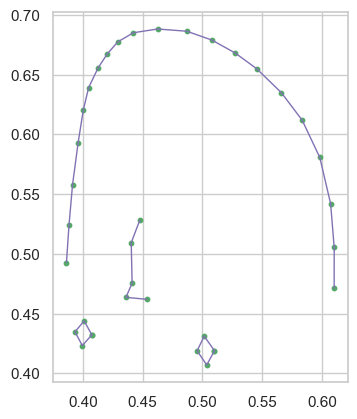

In [30]:

def visualize_keypoints(image_path, desired_keypoint_indices):
    # Initialize MediaPipe Face Detection and Facial Landmarks models
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(refine_landmarks=True)

    # Load the image
    image = cv2.imread(image_path)

    # Process landmarks
    landmarks = face_mesh.process(image)

    if landmarks.multi_face_landmarks:
        for face_landmarks in landmarks.multi_face_landmarks:
            # Create a new figure for the plot
            plt.figure()

            # Draw lines and keypoints
            for indices in desired_keypoint_indices:
                keypoints_to_draw = [(face_landmarks.landmark[index].x, face_landmarks.landmark[index].y) for index in indices]

                # Extract x and y coordinates
                x, y = zip(*keypoints_to_draw)

                # Plot lines
                plt.plot(x, y, color='m', linewidth=1)

                # Plot keypoints
                plt.scatter(x, y, s=10, c='g', marker='o')

            # Set the aspect ratio to equal for a square plot
            plt.gca().set_aspect('equal', adjustable='box')
            plt.show()

# Example usage:
image_path = r'image_31.jpg'  # Replace with the path to your image
desired_keypoint_indices = [
    [234, 93, 132, 58, 172, 136, 150, 149, 176, 148, 152, 377, 400, 378, 379, 365, 397, 288, 361, 323, 454],
    [2,1, 5, 3, 248],
    [474, 475, 476,477,474],
    [469, 470, 471, 472,469],
]

visualize_keypoints(image_path, desired_keypoint_indices)



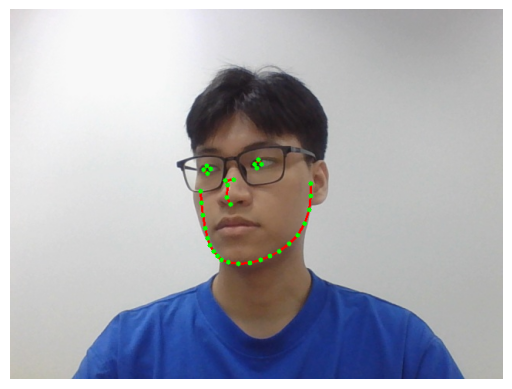

In [31]:
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np

def show_face_landmarks(image_path):
    # Initialize MediaPipe Face Detection and Facial Landmarks models
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(refine_landmarks=True)

    # Define the indices of the desired keypoints
    cheeks = [234, 93, 132, 58, 172, 136, 150, 149, 176, 148, 152, 377, 400, 378, 379, 365, 397, 288, 361, 323, 454]
    nose = [2,1, 5, 3, 248]
    left_iris = [474, 475, 476, 477]
    right_iris = [469, 470, 471, 472]

    desired_keypoint_indices = [cheeks, nose, left_iris, right_iris]

    # Load the image
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error: Unable to load the image.")
        return

    # Process landmarks
    landmarks = face_mesh.process(image)

    if landmarks.multi_face_landmarks:
        for face_landmarks in landmarks.multi_face_landmarks:
            # Draw lines and keypoints on the image
            for indices in desired_keypoint_indices:
                keypoints_to_draw = [(face_landmarks.landmark[index].x, face_landmarks.landmark[index].y) for index in indices]

                # Convert coordinates to pixel values
                h, w, _ = image.shape
                x, y = zip(*[(int(p[0] * w), int(p[1] * h)) for p in keypoints_to_draw])

                # Plot lines
                for i in range(len(x) - 1):
                    cv2.line(image, (x[i], y[i]), (x[i + 1], y[i + 1]), (0, 0, 255), 2)

                # Plot keypoints
                for i in range(len(x)):
                    cv2.circle(image, (x[i], y[i]), 3, (0, 255, 0), -1)

            # Show the image with keypoints and lines
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()

# Example usage:
image_path = r"image_31.jpg"
show_face_landmarks(image_path)


Visual in 3D

In [33]:


def visualize_face_landmarks_3d(image_path):
    # Initialize MediaPipe Face Detection and Facial Landmarks models
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(refine_landmarks=True)

    # Define the indices of the desired keypoints (0 to 467)
    cheeks = [234, 93, 132, 58, 172, 136, 150, 149, 176, 148, 152, 377, 400, 378, 379, 365, 397, 288, 361, 323, 454]
    nose = [2,1, 5, 3, 248]
    left_iris = [474, 475, 476, 477]
    right_iris = [469, 470, 471, 472]
    # left_eyes = [33, 159, 133, 145,]
    # right_eyes = [263, 386, 374, 362]
    desired_keypoint_indices = []  # Modify this list to choose your desired keypoints
    desired_keypoint_indices.append(cheeks)
    desired_keypoint_indices.append(nose)
    desired_keypoint_indices.append(left_iris)
    desired_keypoint_indices.append(right_iris)
    # desired_keypoint_indices.append(left_eyes)
    # desired_keypoint_indices.append(right_eyes)
        # Load the image
    image = cv2.imread(image_path)

    # Process landmarks
    landmarks = face_mesh.process(image)

    if landmarks.multi_face_landmarks:
        # Create empty lists to store the 3D coordinates
        x, y, z = [], [], []

        for face_landmarks in landmarks.multi_face_landmarks:
            for indices in desired_keypoint_indices:
                for index in indices:
                    landmark = face_landmarks.landmark[index]
                    x.append(landmark.x)
                    y.append(landmark.y)
                    z.append(landmark.z)

        # Create a DataFrame from the coordinates
        df = pd.DataFrame({'X': x, 'Y': y, 'Z': z})

        # Create a 3D scatter plot using Plotly Express with smaller keypoint markers
        fig = px.scatter_3d(df, x='X', y='Y', z='Z', labels={'X': 'X', 'Y': 'Y', 'Z': 'Z'},
                            color_discrete_sequence=['blue'], opacity=0.7, size_max=1.5)
        fig.update_traces(marker=dict(size=5))  # Adjust the marker size here
        fig.show()

# Example usage:
image_path = r'image_31.jpg'  # Replace with the path to your image
visualize_face_landmarks_3d(image_path)


Visual all keypoints FaceMesh in 3D.

In [34]:


def visualize_3d_landmarks(image_path):
    # Initialize MediaPipe Face Detection and Facial Landmarks models
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh()

    # Load the image
    image = cv2.imread(image_path)

    # Process landmarks
    landmarks = face_mesh.process(image)

    if landmarks.multi_face_landmarks:
        # Create empty lists to store the 3D coordinates
        x = []
        y = []
        z = []

        for face_landmarks in landmarks.multi_face_landmarks:
            for landmark in face_landmarks.landmark:
                x.append(landmark.x)
                y.append(landmark.y)
                z.append(landmark.z)

        # Create a DataFrame from the coordinates
        df = pd.DataFrame({'X': x, 'Y': y, 'Z': z})

        # Create a 3D scatter plot using Plotly Express with a smaller marker size
        fig = px.scatter_3d(df, x='X', y='Y', z='Z', color=df.index, labels={'X': 'X', 'Y': 'Y', 'Z': 'Z'})
        fig.update_traces(marker=dict(size=2))# Adjust the size_max to your preference
        fig.show()

# Example usage:
image_path = r'image_10.jpg'  # Replace with the path to your image
visualize_3d_landmarks(image_path)
